<a href="https://colab.research.google.com/github/victoriaazabel/SEdigitalorganizations/blob/main/VictoriaZabel_Assignment%20and%20Learning%20Portfolio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Portfolio: Theory

What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?

Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?

Why is it not possible to use the accuracy as loss function?

What is the defined `mnist_loss` function doing?


```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```

Why do we need additionaly the sigmoid() function? What is it technically in our TLU?

Again, what are mini batches, why are we using them and why should they be shuffeld?

# Answers
1. In the beginning of the "MNIST Loss Function" chapter, the "torch.cat()" and ".view(-1, 28*28)" phrases are part of the train_x function. torch.cat is responsible for linking a sequence of tensors along an existing dimension, hence not changing the dimension of the tensors. The view parameters changes this from a list of matrices to one of vectors (from a rank-3 to rank-2 tensor). Additionally, the -1 allows us to view the axis as large as necessary for our data. The 28 x 28 is the number of pixels for the image.

2. check last code section after linear_model = nn.Linear(28*28,1)() has been defined.

3. It is not possible to use the accuracy as the loss function because loss functions need to be differentiable to minimize the difference of predicted and actual outputs, something that the accuracy function is not capable of doing.

4. The mnist_loss function measures the difference between target values and predictions, meaning that it measures the distance. For example, how distant each prediction is from 1 if it should be 1, and how distant it is from 0 if it should be 0. Following this, it will take the mean of the distances.

5. The sigmoid() function is needed in addition to our mnist_lost function because the mnist_loss function assumes that predictions remain between 0 and 1. To ensure and double check that this is the case we need to use the sigmoid() function. In our TLU, it will have either the number 0 or 1 as its ouput.


6. Mini Batches are used to calculate the average loss for a few data items at a time to obtain estimates of the dataset's gradients from the loss function. The larger the batch size, the more accurate and stable the estimate will be. They should be randomly shuffled on every epoch to improve generalization. This needs to be done through varying during training and deciding which data items to put in mini batches.

#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

In [ ]:
#YOUR TASK: Manually train a single layer perceptron without using an optimizer.

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

path = untar_data(URLs.MNIST_SAMPLE)

#hide
Path.BASE_PATH = path

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

#first try:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#computing...:

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

In [ ]:
#loss

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

def linear1(xb):
  return xb@weights + bias

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
# putting...

dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

valid_dl = DataLoader(valid_dset, batch_size=256)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

# second time

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8505 0.9008 0.9291 0.9389 0.9443 0.9526 0.9545 0.9589 0.9613 0.9623 0.9623 0.9633 0.9638 0.9647 0.9662 0.9667 0.9672 0.9672 0.9677 0.9682 

In [ ]:
#YOUR TASK: Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

In [ ]:
linear_model = nn.Linear(28*28,1)

w,b = linear_model.parameters()

dls = DataLoaders(dl, valid_dl)

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

#hide_output
learn.fit(40, 0.1)

learn.recorder.values[-1][2]

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.326422,0.425299,0.504416,00:00
1,0.155275,0.235706,0.801276,00:00
2,0.085114,0.117112,0.913150,00:00
3,0.055286,0.078646,0.940137,00:00
4,0.041516,0.061311,0.954858,00:00
5,0.034534,0.051605,0.963690,00:00
6,0.030557,0.045485,0.966143,00:00
7,0.027993,0.041304,0.966143,00:00
8,0.026156,0.038262,0.968106,00:00
9,0.024739,0.035939,0.968597,00:00


0.983316957950592

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


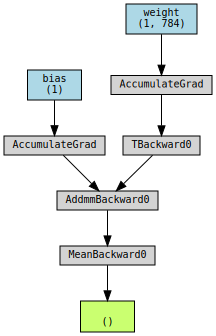

In [ ]:
#2. Code, source: appsilon (2022)

!pip install torchviz

from torchviz import make_dot

model = nn.Linear(28*28,1)
y = model(valid_x)

make_dot(y.mean(), params=dict(model.named_parameters()))